In [1]:
import pandas as pd
import plotly.express as px


df = pd.read_excel("Data/1.4.1.xlsx", sheet_name="Hoja 1")
df.columns = ['Categoria', 'Ano', 'Subcategoria', 'Porcentaje']

df_filtrado = df[df['Ano'] == 2017]  
categorias_clave = ['Zona', 'Sexo', 'Región']  
df_filtrado = df_filtrado[df_filtrado['Categoria'].isin(categorias_clave)]


fig = px.treemap(
    df_filtrado,
    path=['Categoria', 'Subcategoria'],  
    values='Porcentaje',
    color='Porcentaje',
    color_continuous_scale='Blues',
    title='Acceso a servicios básicos (2017)'
)
fig.update_layout(margin=dict(t=30, l=0, r=0, b=0), width=700, height=600)
fig.show()

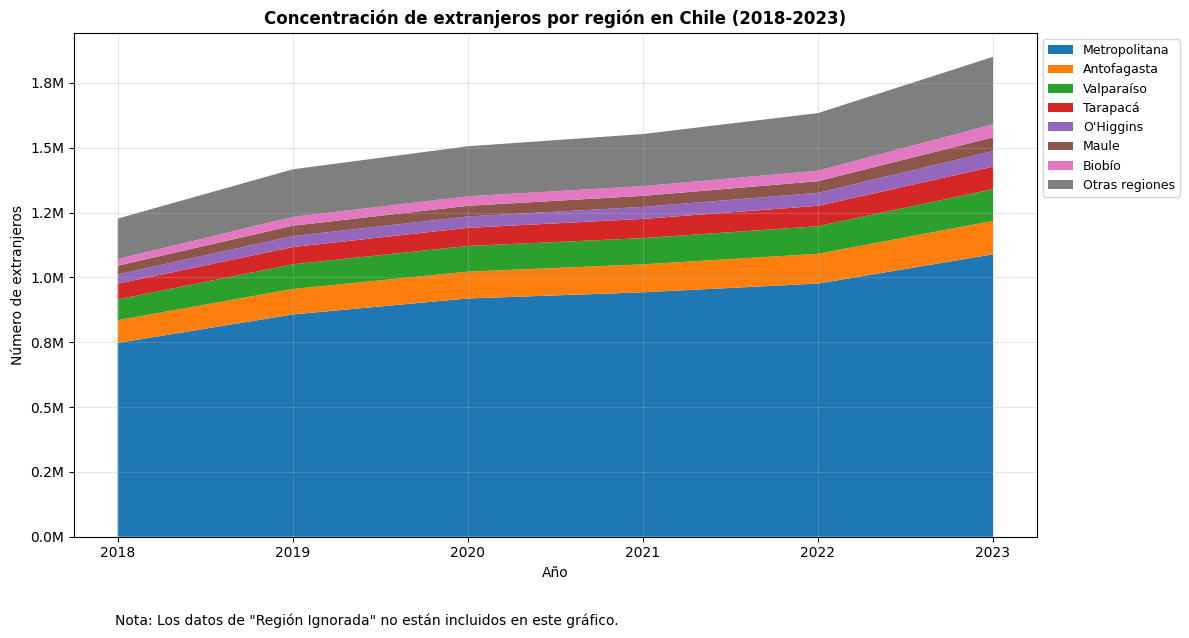

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

data = {
    'Año': [2018, 2019, 2020, 2021, 2022, 2023],
    'Metropolitana': [747258, 857068, 918795, 942503, 976302, 1089049],
    'Antofagasta': [87689, 98049, 103467, 107755, 114696, 128744],
    'Valparaíso': [79956, 95271, 98943, 101146, 106355, 122433],
    'Tarapacá': [60722, 66633, 69872, 74227, 78631, 86526],
    'O\'Higgins': [35386, 42385, 43851, 46279, 50130, 60238],
    'Maule': [34188, 39863, 41243, 42529, 44892, 52954],
    'Biobío': [25679, 33906, 36448, 37575, 40344, 50463],
    'Otras regiones': [155994, 183635, 193014, 200861, 222229, 260170]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.stackplot(df['Año'], 
              [df['Metropolitana'], df['Antofagasta'], df['Valparaíso'], df['Tarapacá'], 
               df['O\'Higgins'], df['Maule'], df['Biobío'], df['Otras regiones']],
              labels=['Metropolitana', 'Antofagasta', 'Valparaíso', 'Tarapacá', 
                      'O\'Higgins', 'Maule', 'Biobío', 'Otras regiones'],
              colors=plt.cm.tab10(range(8)))  

plt.title('Concentración de extranjeros por región en Chile (2018-2023)', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Número de extranjeros')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)


plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000000:.1f}M'))


plt.grid(True, alpha=0.3)


plt.figtext(0.1, -0.05, 'Nota: Los datos de "Región Ignorada" no están incluidos en este gráfico.', fontsize=10, ha='left')

plt.tight_layout()
plt.show()